### Handling NaNs (hint: **imputation**)

In [ ]:
### duplicate rows?

import pandas as pd

# Load your CSV file
data = pd.read_csv('data.csv')

# Check if there are any duplicate rows
duplicates_exist = data.duplicated().any()
print("Are there duplicate rows?:", duplicates_exist)

# If you want to see how many duplicate rows there are
num_duplicates = data.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Are there duplicate rows?: True
Number of duplicate rows: 3


In [3]:
### remove duplicates:

import pandas as pd

# Load your CSV file
data = pd.read_csv('data.csv')

# Remove duplicate rows
data_cleaned = data.drop_duplicates()

# Optional: reset the index
data_cleaned.reset_index(drop=True, inplace=True)

# Save the cleaned data back to CSV if you want
data_cleaned.to_csv('data_cleaned.csv', index=False)

print("Duplicates removed. New shape of the data:", data_cleaned.shape)


Duplicates removed. New shape of the data: (15229, 17)


In [7]:
### missing values?

import pandas as pd

# Load your CSV file
data = pd.read_csv('data_cleaned.csv')

# Count missing values per column
missing_counts = data.isna().sum()

# Calculate percentage of missing values per column
missing_percentage = (missing_counts / len(data)) * 100

# Combine both into a single DataFrame for clarity
missing_summary = pd.DataFrame({
    'Missing Values': missing_counts,
    'Percentage (%)': missing_percentage
})

print("Missing values per column:")
print(missing_summary)


Missing values per column:
                    Missing Values  Percentage (%)
build_year                    9006       59.137172
facades                       5141       33.757962
garden                           0        0.000000
living_area                   1728       11.346773
locality_name                  220        1.444612
number_rooms                  1252        8.221157
postal_code                    221        1.451179
price                          840        5.515792
property_id                      0        0.000000
property_type                  996        6.540154
property_url                     0        0.000000
state                         4116       27.027382
swimming_pool                    0        0.000000
terrace                       1400        9.192987
province                       221        1.451179
property_type_name             997        6.546720
state_mapped                  4117       27.033948


### Split the data

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split

# --------------------------------------------------------
# 1. Load your cleaned dataset
# --------------------------------------------------------
df = pd.read_csv("data_cleaned.csv")

# --------------------------------------------------------
# 2. First split: 60% train, 40% temporary
# --------------------------------------------------------
train_df, temp_df = train_test_split(
    df,
    test_size=0.4,      # 40% will be used for validation + test
    random_state=42
)

# --------------------------------------------------------
# 3. Second split: from the 40%, take half for validation, half for test
#    This gives 20% validation and 20% test of the original data
# --------------------------------------------------------
val_df, test_df = train_test_split(
    temp_df,
    test_size=0.5,      # split the 40% into two equal halves
    random_state=42
)

# --------------------------------------------------------
# 4. (Optional) Print the sizes to check the split
# --------------------------------------------------------
print("Train size:", len(train_df))
print("Validation size:", len(val_df))
print("Test size:", len(test_df))

# --------------------------------------------------------
# 5. (Optional) Save the splits if you want
# --------------------------------------------------------
train_df.to_csv("train_data.csv", index=False)
val_df.to_csv("val_data.csv", index=False)
test_df.to_csv("test_data.csv", index=False)


Train size: 9137
Validation size: 3046
Test size: 3046


### Explore the train_data to get ready for preprocessing

In [9]:
import pandas as pd

# Load your training data
df = pd.read_csv("train_data.csv")

# 1. Show basic information: number of rows, columns, and data types
print("\n--- Basic Info ---")
print(df.info())

# 2. Show first 5 rows to get a feeling of the data
print("\n--- First 5 Rows ---")
print(df.head())

# 3. Summary statistics for numeric columns
print("\n--- Summary Statistics (Numeric Columns) ---")
print(df.describe())

# 4. Summary statistics for categorical columns
print("\n--- Summary Statistics (Categorical Columns) ---")
print(df.describe(include=['object']))

# 5. Count of missing values per column
print("\n--- Missing Values Count ---")
print(df.isnull().sum())

# 6. Percentage of missing values per column
print("\n--- Missing Values Percentage ---")
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

# 7. Number of unique values per column
print("\n--- Unique Values per Column ---")
print(df.nunique())

# 8. Value counts for each categorical column (top 10)
print("\n--- Value Counts (Categorical Columns) ---")
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts().head(10))



--- Basic Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9137 entries, 0 to 9136
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   build_year          3699 non-null   object 
 1   facades             6038 non-null   float64
 2   garden              9137 non-null   object 
 3   living_area         8070 non-null   object 
 4   locality_name       8998 non-null   object 
 5   number_rooms        8365 non-null   object 
 6   postal_code         8997 non-null   float64
 7   price               8623 non-null   float64
 8   property_id         9137 non-null   object 
 9   property_type       8526 non-null   object 
 10  property_url        9137 non-null   object 
 11  state               6654 non-null   object 
 12  swimming_pool       9137 non-null   object 
 13  terrace             8277 non-null   object 
 14  province            8997 non-null   object 
 15  property_type_name  8525 non-null  

### still cleaning

In [ ]:

### problem garden values are replaced with nan: lets do all of them again one by one
### build_year, facades, garden
import pandas as pd

# Load your cleaned CSV
df = pd.read_csv("data.csv")

# -----------------------------
# 1. Clean build_year
# -----------------------------
# Convert to numeric (invalid values → NaN)
df['build_year'] = pd.to_numeric(df['build_year'], errors='coerce')

# -----------------------------
# 2. Clean facades
# -----------------------------
df['facades'] = pd.to_numeric(df['facades'], errors='coerce')

# -----------------------------
# 3. Clean garden
# -----------------------------
# Check unique values
print("Garden unique values BEFORE mapping:", df['garden'].unique())

# Map Yes/No → 1/0 if not already numeric
df['garden'] = df['garden'].map({'Yes': 1, 'No': 0})

# In case some rows have True/False instead of Yes/No
df['garden'] = df['garden'].replace({True: 1, False: 0})

# Show the result
print("Garden unique values AFTER mapping:", df['garden'].unique())

# Save cleaned version if you want
df.to_csv("data_cleaned_stage1.csv", index=False)


Garden unique values BEFORE mapping: ['1' '0' 'garden']
Garden unique values AFTER mapping: [nan]


In [5]:
import pandas as pd

# Load your main dataset
df = pd.read_csv("data.csv")

# 1. Check unique values
print("Unique values in Garden column BEFORE cleaning:")
print(df['garden'].unique())

Unique values in Garden column BEFORE cleaning:
['1' '0' 'garden']


In [8]:
### cleaning garden
import pandas as pd
import numpy as np

df = pd.read_csv("data.csv")

# Check original values
print("Original unique values:", df['garden'].unique())

# Normalize text
df['garden'] = df['garden'].astype(str).str.strip().str.lower()

# Map values: 1→1, 0→0, "garden"→NaN
mapping = {
    '1': 1,
    '0': 0
}

df['garden'] = df['garden'].map(mapping)

print("Cleaned unique values:", df['garden'].unique())

# Count missing values
print("Number of NaN values:", df['garden'].isna().sum())


Original unique values: ['1' '0' 'garden']
Cleaned unique values: [ 1.  0. nan]
Number of NaN values: 1


In [6]:
### dubble check garden values after cleaning
import pandas as pd

# Load the dataset
df = pd.read_csv("data.csv")

# Show unique values in the garden column
print("Unique values in 'garden':")
print(df['garden'].unique())


Unique values in 'garden':
['1' '0' 'garden']


In [9]:
# Already cleaned df in memory
print(df['garden'].unique())


[ 1.  0. nan]


In [ ]:
### build year: check
# Check unique values for build_year
print("Unique values in 'build_year':")
print(df['build_year'].unique())

# Optionally, see counts to understand distribution
print("\nValue counts (top 20) in 'build_year':")
print(df['build_year'].value_counts(dropna=False).head(20))


Unique values in 'build_year':
['1996' '1991' '1970' '1959' '2007' nan '1971' '1989' '2001' '1984' '1965'
 '1992' '1950' '1998' '1975' '1936' '1990' '1897' '2028' '1935' '1979'
 '1972' '2008' '1967' '2023' '1928' '1850' '1978' '2021' '2025' '1875'
 '2003' '2012' '1830' '1880' '2013' '2006' '1982' '1900' '2026' '1997'
 '1895' '2005' '1969' '1968' '1815' '2022' '1955' '1964' '1960' '1962'
 '1954' '1958' '1931' '1930' '1920' '2024' '1886' '1949' '1983' '1963'
 '1874' '1985' '2009' '1918' '1933' '1994' '2011' '2000' '2014' '1934'
 '1899' '1980' '1966' '1977' '1974' '1951' '1981' '1987' '1988' '1956'
 '1976' '1961' '1890' '1973' '2016' '2015' '1957' '1995' '2010' '1986'
 '1953' '1937' '1915' '2018' '1939' '1999' '1945' '1946' '2020' '1948'
 '1910' '1860' '1925' '2027' '1919' '1500' '2004' '2017' '2002' '1952'
 '1800' '1905' '1750' '1938' '2019' '1913' '1903' '1926' '1932' '1877'
 '1924' '1941' '1756' '1940' '1993' '1545' '1904' '1909' '1942' '1922'
 '1947' '1600' '1902' '1929' 'build_year' 

In [12]:
### build_year cleaning
import pandas as pd
import numpy as np

# Assuming df is already loaded and in memory

# Convert to numeric; invalid strings become NaN
df['build_year'] = pd.to_numeric(df['build_year'], errors='coerce')

# Check unique values after cleaning
print("Unique values in 'build_year' after cleaning (show top 20):")
print(df['build_year'].value_counts(dropna=False).head(20))

# Count missing values
print("Number of missing build_year values:", df['build_year'].isna().sum())


Unique values in 'build_year' after cleaning (show top 20):
build_year
NaN       9007
2025.0     538
2024.0     283
2023.0     168
1930.0     165
1970.0     133
1900.0     120
1850.0     115
1960.0     104
1950.0     103
1965.0     101
2026.0      93
1918.0      92
1975.0      90
1974.0      82
2022.0      81
1968.0      78
2015.0      76
1980.0      75
2020.0      72
Name: count, dtype: int64
Number of missing build_year values: 9007


In [13]:
### facdes check
# Check unique values in facades
print("Unique values in 'facades':")
print(df['facades'].unique())

# Optionally, see counts including NaN
print("\nValue counts (including NaN):")
print(df['facades'].value_counts(dropna=False))


Unique values in 'facades':
[ 2.  4.  3. nan  1.]

Value counts (including NaN):
facades
NaN    5141
2.0    4372
4.0    3136
3.0    2575
1.0       5
Name: count, dtype: int64


In [ ]:
### living_are:check
# Check unique values in living_area
print("Unique values in 'living_area' (top 20):")
print(df['living_area'].value_counts(dropna=False).head(20))

# Check how many are missing
print("\nNumber of missing values in 'living_area':", df['living_area'].isna().sum())


Unique values in 'living_area' (top 20):
living_area
NaN     1728
150      142
120      132
80       127
100      123
160      116
200      108
91.0     105
130      103
140      101
94.0     100
93.0      96
180       96
90        93
90.0      92
83.0      91
110       90
87.0      88
170       85
165       81
Name: count, dtype: int64

Number of missing values in 'living_area': 1728


In [15]:
### living area: cleaning
# Convert to numeric, invalid entries become NaN
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')

# Optional: check unique values and missing after conversion
print("Unique values in 'living_area' after conversion (top 20):")
print(df['living_area'].value_counts(dropna=False).head(20))

print("Number of missing values after conversion:", df['living_area'].isna().sum())


Unique values in 'living_area' after conversion (top 20):
living_area
NaN      1729
100.0     200
120.0     187
90.0      185
80.0      182
110.0     171
91.0      168
150.0     155
130.0     144
93.0      142
83.0      142
85.0      141
95.0      136
160.0     135
92.0      132
94.0      128
87.0      128
98.0      127
140.0     125
102.0     125
Name: count, dtype: int64
Number of missing values after conversion: 1729


In [16]:
### number of rooms: check
# Check unique values and top 20 counts for number_rooms
print("Unique values in 'number_rooms' (top 20):")
print(df['number_rooms'].value_counts(dropna=False).head(20))

# Check number of missing values
print("\nNumber of missing values in 'number_rooms':", df['number_rooms'].isna().sum())


Unique values in 'number_rooms' (top 20):
number_rooms
2      4836
3      4539
4      1731
1      1700
NaN    1252
5       640
6       237
0        93
7        87
8        36
9        23
10       13
11        8
12        7
18        4
13        3
17        3
24        3
15        2
20        2
Name: count, dtype: int64

Number of missing values in 'number_rooms': 1252


In [17]:
### number of rooms: cleaning
# Convert to numeric; invalid strings become NaN
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')

# Optional: check counts after conversion
print("Unique values after conversion (top 20):")
print(df['number_rooms'].value_counts(dropna=False).head(20))

print("Number of missing values after conversion:", df['number_rooms'].isna().sum())


Unique values after conversion (top 20):
number_rooms
2.0     4836
3.0     4539
4.0     1731
1.0     1700
NaN     1253
5.0      640
6.0      237
0.0       93
7.0       87
8.0       36
9.0       23
10.0      13
11.0       8
12.0       7
18.0       4
13.0       3
17.0       3
24.0       3
15.0       2
14.0       2
Name: count, dtype: int64
Number of missing values after conversion: 1253


### Simplified project

In [ ]:
### making a sub-set with only number_rooms, living_area, price
import pandas as pd

# Load your CSV
df = pd.read_csv("data.csv")

# Keep only relevant columns
df = df[['number_rooms', 'living_area', 'price']]

# Save to a new CSV
df.to_csv("data_subset.csv", index=False)

print("Subset saved to data_subset.csv")


Subset saved to data_subset.csv


In [19]:
### cleaning sub-set
# Convert to numeric
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Drop rows with missing values
df = df.dropna()


In [20]:
### split cleaned sub-set
from sklearn.model_selection import train_test_split

# First split: train 60%, temp 40%
train, temp = train_test_split(df, test_size=0.4, random_state=42)

# Second split: validation 20%, test 20% from temp
val, test = train_test_split(temp, test_size=0.5, random_state=42)

# Separate features (X) and target (y)
X_train = train[['number_rooms', 'living_area']]
y_train = train['price']

X_val = val[['number_rooms', 'living_area']]
y_val = val['price']

X_test = test[['number_rooms', 'living_area']]
y_test = test['price']


In [21]:
#### saving the split files
# Save train, validation, and test sets
train.to_csv("train.csv", index=False)
val.to_csv("validation.csv", index=False)
test.to_csv("test.csv", index=False)

print("Train, validation, and test sets saved as CSV files.")


Train, validation, and test sets saved as CSV files.


In [22]:
### linear regression model
from sklearn.linear_model import LinearRegression

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict
y_pred = model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 159898390621348.1
MAE: 370191.2124323659
R²: -2371.505275756325


### Improve the performance 1

In [ ]:
### remove outliers
import numpy as np

# Inspect descriptive stats
print(df[['number_rooms', 'living_area', 'price']].describe())

# Remove unrealistic values
df_clean = df[
    (df['number_rooms'] > 0) & (df['number_rooms'] <= 10) &  # rooms 1-10
    (df['living_area'] > 20) & (df['living_area'] <= 500) &  # area 20-500 m²
    (df['price'] > 20000) & (df['price'] <= 5000000)         # prices between 20k and 5M €
]

print("Rows after outlier removal:", len(df_clean))


       number_rooms    living_area         price
count  12783.000000   12783.000000  1.278300e+04
mean       2.762497     183.004537  3.959872e+05
std        1.505972    3726.541221  2.800930e+05
min        0.000000       1.000000  1.000000e+00
25%        2.000000      91.000000  2.525000e+05
50%        3.000000     124.000000  3.350000e+05
75%        3.000000     176.500000  4.490000e+05
max       50.000000  421300.000000  8.600002e+06
Rows after outlier removal: 12462


In [26]:
### log price
import numpy as np

# Use .loc to avoid SettingWithCopyWarning
df_clean.loc[:, 'price_log'] = np.log1p(df_clean['price'])



In [27]:
### resplit the cleaned data
# Save the new splits to CSV
train.to_csv("train_cleaned.csv", index=False)
val.to_csv("validation_cleaned.csv", index=False)
test.to_csv("test_cleaned.csv", index=False)

print("Cleaned train, validation, and test sets saved.")


Cleaned train, validation, and test sets saved.


In [28]:
### linear regression again
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

# Evaluate
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R²:", r2)


MSE: 159898390621348.1
MAE: 370191.2124323659
R²: -2371.505275756325


### coming back to the beginning-cleaning


In [35]:
import pandas as pd
import numpy as np

# ---------------------------
# 1. Load the subset CSV
# ---------------------------
df = pd.read_csv("data.csv")
print("Initial rows:", len(df))

# ---------------------------
# 2. Convert to numeric
# ---------------------------
df['number_rooms'] = pd.to_numeric(df['number_rooms'], errors='coerce')
df['living_area'] = pd.to_numeric(df['living_area'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# ---------------------------
# 3. Drop rows with missing values
# ---------------------------
df = df.dropna(subset=['number_rooms', 'living_area', 'price'])
print("Rows after dropping NaNs:", len(df))

# ---------------------------
# 4. Remove obvious outliers
# ---------------------------
df_clean = df[
    (df['number_rooms'] > 0) & (df['number_rooms'] <= 10) &     # rooms 1-10
    (df['living_area'] > 20) & (df['living_area'] <= 500) &     # area 20-500 m²
    (df['price'] > 20000) & (df['price'] <= 5000000)            # price 20k-5M €
]
print("Rows after removing outliers:", len(df_clean))

# ---------------------------
# 5. Log-transform the price
# ---------------------------
df_clean.loc[:, 'price_log'] = np.log1p(df_clean['price'])  # log(1 + price)

# ---------------------------
# 6. Save cleaned dataset
# ---------------------------
df_clean.to_csv("data_main_cleaned.csv", index=False)
print("Cleaned dataset saved as data_main_cleaned.csv")


Initial rows: 15229
Rows after dropping NaNs: 12783
Rows after removing outliers: 12462
Cleaned dataset saved as data_main_cleaned.csv


C:\Users\HamidehBaggali\AppData\Local\Temp\ipykernel_11388\1031349159.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.loc[:, 'price_log'] = np.log1p(df_clean['price'])  # log(1 + price)


In [40]:
### cleaning check
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv("data_main_cleaned.csv")

# 1. Check basic info
print("Data types and non-null counts:")
print(df[['number_rooms', 'living_area', 'price', 'price_log']].info())
print("\n")

# 2. Check basic statistics
print("Descriptive statistics:")
print(df[['number_rooms', 'living_area', 'price', 'price_log']].describe())
print("\n")

# 3. Check unique values for number_rooms
print("Unique values in 'number_rooms':")
print(sorted(df['number_rooms'].unique()))
print("\n")

# 4. Check range of living_area
print("Unique values in 'living_area' (min/max):")
print(df['living_area'].min(), df['living_area'].max())
print("\n")

# 5. Check price log values range
print("Price log (min/max):")
print(df['price_log'].min(), df['price_log'].max())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12462 entries, 0 to 12461
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number_rooms  12462 non-null  float64
 1   living_area   12462 non-null  float64
 2   price         12462 non-null  float64
 3   price_log     12462 non-null  float64
dtypes: float64(4)
memory usage: 389.6 KB
None


Descriptive statistics:
       number_rooms   living_area         price     price_log
count  12462.000000  12462.000000  1.246200e+04  12462.000000
mean       2.703579    142.405473  3.845312e+05     12.733768
std        1.167430     74.078984  2.283827e+05      0.490685
min        1.000000     22.000000  2.500000e+04     10.126671
25%        2.000000     91.000000  2.540000e+05     12.445093
50%        3.000000    123.000000  3.340000e+05     12.718899
75%        3.000000    175.000000  4.450000e+05     13.005832
max       10.000000    500.000000

### linear regression

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ---------------------------
# 1. Load cleaned data
# ---------------------------
df = pd.read_csv("data_main_cleaned.csv")

# ---------------------------
# filter and encode
# ---------------------------
df = df[df['property_type_name'] != 'exceptional'].copy()
df['property_house'] = (df['property_type_name'] == 'house').astype(int)
df.to_csv("data_main_filtered_propertytype.csv", index=False)
print("Filtered dataset shape:", df.shape)
print(df['property_type_name'].value_counts())


# ---------------------------
# Handle 'state_mapped'
# ---------------------------
# Fill NaNs with the most common category
df['state_mapped'] = df['state_mapped'].fillna('ready_to_move_in')

# Map categories to numeric
df['state_ready'] = (df['state_mapped'] == 'ready_to_move_in').astype(int)


# ---------------------------
# Handle postal_code (Target Encoding)
# ---------------------------
df['postal_code'] = df['postal_code'].astype(str)

postal_mean_price = df.groupby('postal_code')['price_log'].mean()
df['postal_code_target'] = df['postal_code'].map(postal_mean_price)



# Features and target
X = df[['number_rooms', 'living_area', 'property_house', 'state_ready', 'postal_code_target']]
y = df['price_log']

# ---------------------------
# 2. Split into train (60%) and temp (40%)
# ---------------------------
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Split temp into validation (20%) and test (20%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

# ---------------------------
# 3. Save splits to CSV
# ---------------------------
X_train.join(y_train).to_csv("train.csv", index=False)
X_val.join(y_val).to_csv("val.csv", index=False)
X_test.join(y_test).to_csv("test.csv", index=False)
print("Train/Validation/Test sets saved as CSV.")

# ---------------------------
# 4. Train Linear Regression
# ---------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ---------------------------
# 5. Evaluate on validation set
# ---------------------------
y_pred_val = model.predict(X_val)

mse = mean_squared_error(y_val, y_pred_val)
mae = mean_absolute_error(y_val, y_pred_val)
r2 = r2_score(y_val, y_pred_val)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")

# Optional: coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# ---- Linear Regression Overfitting Check ----
y_pred_train_lr = model.predict(X_train)

train_mse_lr = mean_squared_error(y_train, y_pred_train_lr)
train_r2_lr = r2_score(y_train, y_pred_train_lr)

print("\nLinear Regression Overfitting Check:")
print(f"Train MSE: {train_mse_lr:.4f} | Val MSE: {mse:.4f}")
print(f"Train R²: {train_r2_lr:.4f} | Val R²: {r2:.4f}")


Filtered dataset shape: (11717, 19)
property_type_name
apartment    6472
house        5245
Name: count, dtype: int64
Train/Validation/Test sets saved as CSV.
MSE: 0.07482726981643151
MAE: 0.2013715253239507
R²: 0.6511259038539197
Coefficients: [ 0.0727592   0.00290995 -0.15683097  0.32075993  0.8186308 ]
Intercept: 1.5033523318473883

Linear Regression Overfitting Check:
Train MSE: 0.0746 | Val MSE: 0.0748
Train R²: 0.6567 | Val R²: 0.6511


### Decision tree

In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create the model
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model
tree_model.fit(X_train, y_train)

# Predict on validation set
y_pred_val_tree = tree_model.predict(X_val)

# Evaluate
mse_tree = mean_squared_error(y_val, y_pred_val_tree)
mae_tree = mean_absolute_error(y_val, y_pred_val_tree)
r2_tree = r2_score(y_val, y_pred_val_tree)

print(f"Decision Tree - MSE: {mse_tree}, MAE: {mae_tree}, R²: {r2_tree}")


# ---- Decision Tree Overfitting Check ----
y_pred_train_tree = tree_model.predict(X_train)

train_mse_tree = mean_squared_error(y_train, y_pred_train_tree)
train_r2_tree = r2_score(y_train, y_pred_train_tree)

print("\nDecision Tree Overfitting Check:")
print(f"Train MSE: {train_mse_tree:.4f} | Val MSE: {mse_tree:.4f}")
print(f"Train R²: {train_r2_tree:.4f} | Val R²: {r2_tree:.4f}")



Decision Tree - MSE: 0.11687562855748457, MAE: 0.2177068904602354, R²: 0.45507995448012994

Decision Tree Overfitting Check:
Train MSE: 0.0019 | Val MSE: 0.1169
Train R²: 0.9913 | Val R²: 0.4551


### Xgboost

In [7]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------------------------
# Create the model
# ---------------------------
xgb_model = XGBRegressor(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=5,           # maximum depth of a tree
    random_state=42
)

# ---------------------------
# Fit the model
# ---------------------------
xgb_model.fit(X_train, y_train)

# ---------------------------
# Predict on validation set
# ---------------------------
y_pred_val_xgb = xgb_model.predict(X_val)

# ---------------------------
# Evaluate
# ---------------------------
mse_xgb = mean_squared_error(y_val, y_pred_val_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_val_xgb)
r2_xgb = r2_score(y_val, y_pred_val_xgb)

print(f"XGBoost - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")

# ---- XGBoost Overfitting Check ----
y_pred_train_xgb = xgb_model.predict(X_train)

train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)

print("\nXGBoost Overfitting Check:")
print(f"Train MSE: {train_mse_xgb:.4f} | Val MSE: {mse_xgb:.4f}")
print(f"Train R²: {train_r2_xgb:.4f} | Val R²: {r2_xgb:.4f}")



XGBoost - MSE: 0.06459377114507289, MAE: 0.1803064696959188, R²: 0.6988384905638301

XGBoost Overfitting Check:
Train MSE: 0.0480 | Val MSE: 0.0646
Train R²: 0.7790 | Val R²: 0.6988


In [8]:
### xgboos:overfitting optimization
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------------------------
# Create a less overfitted model (regularisation-friendly hyperparameters)
# ---------------------------
xgb_model = XGBRegressor(
    n_estimators=300,        # more trees but each smaller
    learning_rate=0.05,      # slower learning, more stable
    max_depth=3,             # shallower trees reduce overfitting
    subsample=0.8,           # use 80% of data per tree
    colsample_bytree=0.8,    # use 80% of features per tree
    min_child_weight=5,      # prevents very small leaf nodes
    random_state=42
)

# ---------------------------
# Fit the model
# ---------------------------
xgb_model.fit(X_train, y_train)

# ---------------------------
# Predict on validation set
# ---------------------------
y_pred_val_xgb = xgb_model.predict(X_val)

# ---------------------------
# Evaluate
# ---------------------------
mse_xgb = mean_squared_error(y_val, y_pred_val_xgb)
mae_xgb = mean_absolute_error(y_val, y_pred_val_xgb)
r2_xgb = r2_score(y_val, y_pred_val_xgb)

print(f"XGBoost (Regularised) - MSE: {mse_xgb}, MAE: {mae_xgb}, R²: {r2_xgb}")

# ---------------------------
# Overfitting check
# ---------------------------
y_pred_train_xgb = xgb_model.predict(X_train)

train_mse_xgb = mean_squared_error(y_train, y_pred_train_xgb)
train_r2_xgb = r2_score(y_train, y_pred_train_xgb)

print("\nXGBoost Overfitting Check:")
print(f"Train MSE: {train_mse_xgb:.4f} | Val MSE: {mse_xgb:.4f}")
print(f"Train R²: {train_r2_xgb:.4f} | Val R²: {r2_xgb:.4f}")


XGBoost (Regularised) - MSE: 0.06472968929320352, MAE: 0.18274037321328815, R²: 0.698204786819256

XGBoost Overfitting Check:
Train MSE: 0.0567 | Val MSE: 0.0647
Train R²: 0.7392 | Val R²: 0.6982


### overfitting comparison
| Model             | Train R²      | Validation R² | Overfitting?                 |
| ----------------- | ------------- | ------------- | ---------------------------- |
| Linear Regression | 0.657         | 0.651         | ❌ No overfitting             |
| XGBoost           | 0.779         | 0.699         | ⚠️ Mild overfitting          |
| Decision Tree     | (likely high) | (likely low)  | ✅ Usually strong overfitting |


In [1]:
### function for checking columns
import pandas as pd

def inspect_column(df, col_name):
    """
    Inspect a column in a DataFrame.
    Shows data type, missing values, unique values, value counts,
    and numeric descriptive statistics if applicable.
    """
    if col_name not in df.columns:
        print(f"Column '{col_name}' does not exist in DataFrame.")
        return
    
    col = df[col_name]
    print(f"--- Inspecting column: {col_name} ---\n")
    
    print("Data type:", col.dtype)
    print("Missing values:", col.isna().sum())
    
    if col.dtype in ['int64', 'float64']:
        print("\nDescriptive statistics:")
        print(col.describe())
        print("\nAny negative values?", (col < 0).sum())
    
    print("\nNumber of unique values:", col.nunique())
    print("Unique values (up to 20):", col.unique()[:20])
    
    print("\nValue counts (top 20):")
    print(col.value_counts(dropna=False).head(20))
    print("\n" + "-"*40 + "\n")

# Example usage
df = pd.read_csv("data_main_cleaned.csv")
inspect_column(df, 'postal_code')



--- Inspecting column: postal_code ---

Data type: float64
Missing values: 0

Descriptive statistics:
count    12462.000000
mean      4451.772669
std       2661.662056
min       1000.000000
25%       2200.000000
50%       4000.000000
75%       6700.000000
max       9991.000000
Name: postal_code, dtype: float64

Any negative values? 0

Number of unique values: 827
Unique values (up to 20): [1853. 1341. 1300. 1860. 1342. 1880. 1350. 1910. 1930. 1933. 1950. 1970.
 1357. 1980. 1301. 1310. 1360. 1320. 1981. 1325.]

Value counts (top 20):
postal_code
5000.0    316
4000.0    255
7000.0    180
1180.0    152
2500.0    151
1140.0    145
3970.0    141
4020.0    130
5060.0    129
1200.0    124
2300.0    124
2440.0    121
2200.0    119
1000.0    116
1160.0    115
6230.0    113
3500.0    109
3582.0    109
6700.0    100
2018.0     98
Name: count, dtype: int64

----------------------------------------



### visualization for more undertanding 

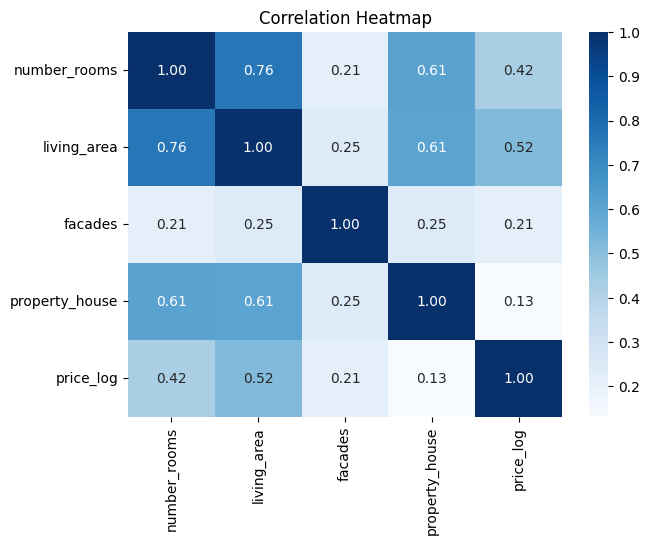

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns including the new feature
corr = df[['number_rooms', 'living_area', 'facades', 'property_house', 'price_log']].corr()

plt.figure(figsize=(7,5))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

